In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as la
import non_backtracking_tools as nbt
import nb_general as nb
import matplotlib.pyplot as plt

In [2]:
# Create K
create_K = lambda A, D: np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

In [3]:
# # Create example
# G = nx.random_partition_graph([np.random.randint(20,100),np.random.randint(20,100)],0.25,.05)
# F = list(nx.connected_component_subgraphs(G))
# G = F[0]
G = nx.Graph([[1,2],[2,3],[3,4],[2,4],[3,1]])
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = create_K(A,D)

In [4]:
# Get eigenvectors of K
kvals, kvecs = la.eig(K)
vals, vecs = la.eig(kvecs)

In [5]:
kvals

array([-7.60689853e-01+0.85787363j, -7.60689853e-01-0.85787363j,
       -9.71445147e-17+1.j        , -9.71445147e-17-1.j        ,
        1.52137971e+00+0.j        ,  1.00000000e+00+0.j        ,
       -5.00000000e-01+1.32287566j, -5.00000000e-01-1.32287566j])

In [6]:
not_d = []
for _ in range(1000):
    G = nx.random_partition_graph([np.random.randint(20,100),np.random.randint(20,100)],0.25,.05)
    F = list(nx.connected_component_subgraphs(G))
    G = F[0]
    A = nx.adjacency_matrix(G).todense()
    D = np.diag(list(dict(G.degree).values()))
    K = create_K(A,D)
    kvals, kvecs = la.eig(K)
    diff = la.norm(la.inv(kvecs)@kvecs - np.eye(kvecs.shape[0]))
    if diff < 1e-8 and diff > -1e-8:
        if 1 in list(dict(G.degree).values()):
            print('Error')
            nx.draw(G)
            plt.show()
        continue
    else:
        not_d.append(G)
        

In [7]:
count = 0
for g in not_d:
    d = list(dict(G.degree).values())
    if 1 in d:
        nx.draw(g)
        plt.show()
    count += 1
print(count)

8


In [8]:
len(not_d)

8

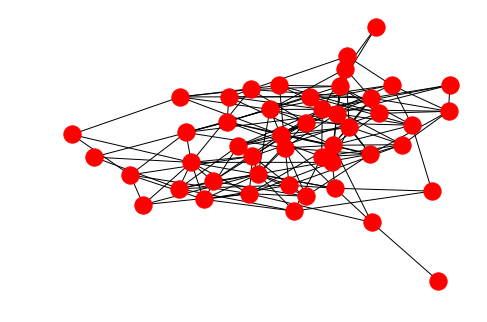

In [26]:
second = not_d[1]
nx.draw(second)
plt.show()

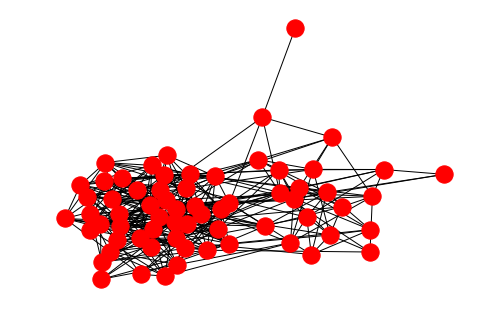

In [16]:
third = not_d[2]
nx.draw(third)
plt.show()

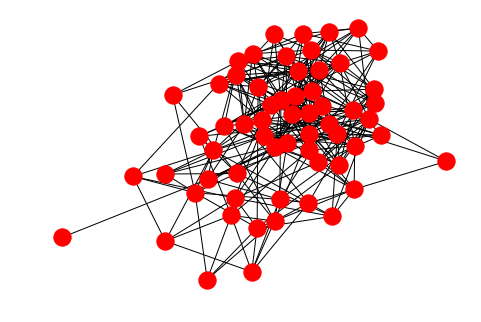

In [17]:
fourth = not_d[3]
nx.draw(fourth)
plt.show()

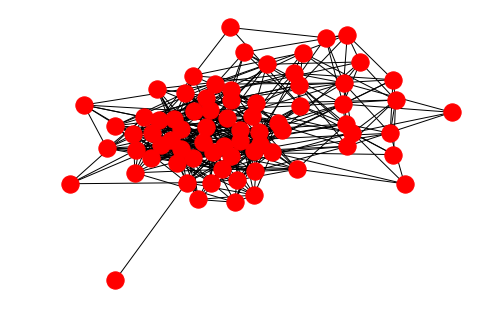

In [18]:
fifth = not_d[4]
nx.draw(fifth)
plt.show()

In [9]:
pert = np.block([[A,D],[np.zeros_like(A),np.zeros_like(D)]])

In [11]:
vals, vecs = la.eig(pert)

In [14]:
la.norm(la.inv(vecs)@vecs-np.eye(vecs.shape[0]))

3.8286659166632732e-14

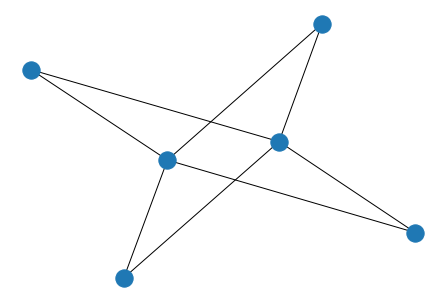

In [11]:
g = nx.Graph([[1,2],[2,3],[3,4],[4,1],[1,5],[5,3],[3,7],[7,1]])
nx.draw(g)

In [12]:
ex = nb.NBEigVals(g)

In [15]:
ex.mu_vals

array([-7.77156117e-16+1.73205081j, -7.77156117e-16-1.73205081j,
       -1.73205081e+00+0.j        , -1.00000000e+00+0.j        ,
        1.73205081e+00+0.j        ,  1.00000000e+00+0.j        ,
        1.73472348e-18+1.j        ,  1.73472348e-18-1.j        ,
        0.00000000e+00+1.j        ,  0.00000000e+00-1.j        ,
        1.38777878e-17+1.j        ,  1.38777878e-17-1.j        ])